# Gold contango

We examine futures prices for gold, in particular, the contango situation. 
The futures price may be either higher or lower than the spot price. 
When the spot price is higher than the futures price, the market is said to 
be in **backwardation**. If the spot price is lower than the futures price, 
the market is in **contango**.

The futures or forward curve would typically be upward sloping, 
since contracts for further dates would typically trade at even higher prices. 
A contango is normal for a non-perishable commodity that has 
a *cost of carry*. Such costs include warehousing fees and 
interest forgone on money tied up, 
less income from leasing out the commodity if possible (e.g. gold). 

Our study examines a segment of the futures curve, specifically the 
nearby contract versus another dated six months thereafter, 
for gold traded on the COMEX exchange. We use the expected 
LIBOR interest rate for the identical segment to adjust the 
cost of carry. We then compare this supply/demand indicator against spot prices. 

The *London Bullion Market Association* ceased publishing daily data 
on their *Gold Forward Offered Rate* (**GOFO**), as of 30 January 2015 -- 
so we develop an observable proxy called *tango*. 

During 2015 we detected strong *negative* correlation between price change and tango, 
however, in 2016 that strong correlation became *positive* -- 
thus we conclude the relationship is spurious. 
The observed correlations are mere artifacts 
which do not imply any significant economic relationships.

Tango as an indicator is **not** insightful for price changes 
whenever it is at the extremes of its expected range. 
This can be verified by comparing various commits over time 
of this notebook in the repository.

Short URL: https://git.io/xau-contango

*Dependencies:*

- fecon235 repository https://github.com/rsvp/fecon235
- Python: matplotlib, pandas
     
*CHANGE LOG*

    2016-12-04  Solve #2 by v5 and PREAMBLE-p6.16.0428 upgrades. 
                   Switch from fecon to fecon235 for main import module. 
                   Minor edits given more data and change in futures basis.
                   Previous conclusion is negated. Correlation is artificial.
    2015-10-11  Code review.
    2015-09-11  First version.

In [1]:
from fecon235.fecon235 import *

In [2]:
#  PREAMBLE-p6.16.0428 :: Settings and system details
from __future__ import absolute_import, print_function
system.specs()
pwd = system.getpwd()   # present working directory as variable.
print(" ::  $pwd:", pwd)
#  If a module is modified, automatically reload it:
%load_ext autoreload
%autoreload 2
#       Use 0 to disable this feature.

#  Notebook DISPLAY options:
#      Represent pandas DataFrames as text; not HTML representation:
import pandas as pd
pd.set_option( 'display.notebook_repr_html', False )
from IPython.display import HTML # useful for snippets
#  e.g. HTML('<iframe src=http://en.mobile.wikipedia.org/?useformat=mobile width=700 height=350></iframe>')
from IPython.display import Image 
#  e.g. Image(filename='holt-winters-equations.png', embed=True) # url= also works
from IPython.display import YouTubeVideo
#  e.g. YouTubeVideo('1j_HxD4iLn8', start='43', width=600, height=400)
from IPython.core import page
get_ipython().set_hook('show_in_pager', page.as_hook(page.display_page), 0)
#  Or equivalently in config file: "InteractiveShell.display_page = True", 
#  which will display results in secondary notebook pager frame in a cell.

#  Generate PLOTS inside notebook, "inline" generates static png:
%matplotlib inline   
#          "notebook" argument allows interactive zoom and resize.

 ::  Python 2.7.11
 ::  IPython 4.2.0
 ::  jupyter_core 4.1.0
 ::  notebook 4.1.0
 ::  matplotlib 1.5.1
 ::  numpy 1.10.4
 ::  pandas 0.18.0
 ::  pandas_datareader 0.2.1
 ::  Repository: fecon235 v5.16.1107 develop
 ::  Timestamp: 2016-12-04, 17:25:44 UTC
 ::  $pwd: /media/yaya/virt15h/virt/dbx/Dropbox/ipy/fecon235/nb


In [3]:
#  SET UP the particular (f4) futures contracts of interest:
s_libor = 'f4libor16z'
s_xau1  = 'f4xau16z'
s_xau2  = 'f4xau17m'

#  f4libor* refers to the CME Eurodollar futures.

#  The second nearby contract for gold (xau)
#  should be 6 months after the first using the 
#  June (m) and December (z) cycle

#  RE-RUN this entire study by merely changing the string symbols.

In [4]:
#  Retrieve data:
libor = todf( 100 - get(s_libor) )
#             ^convert quotes to conventional % format
xau1 = get(s_xau1)
xau2 = get(s_xau2)

In [5]:
tail(libor)

                 Y
Date              
2016-11-23  0.9950
2016-11-25  0.9975
2016-11-28  0.9925
2016-11-29  0.9825
2016-11-30  0.9900
2016-12-01  0.9875
2016-12-02  0.9875

In [6]:
tail(xau1)

                 Y
Date              
2016-11-23  1189.3
2016-11-25  1178.4
2016-11-28  1190.8
2016-11-29  1187.9
2016-11-30  1170.8
2016-12-01  1166.9
2016-12-02  1175.1

In [7]:
tail(xau2)

                 Y
Date              
2016-11-23  1198.3
2016-11-25  1187.0
2016-11-28  1200.0
2016-11-29  1197.0
2016-11-30  1179.9
2016-12-01  1175.3
2016-12-02  1183.8

Usually contango is described in price unit terms, however, we prefer the scale-free annualized percentage format. This places the measure on par with the way interest rates are usually quoted.

In [8]:
#  Compute the contango in terms of annualized percentage:
contango = todf( ((xau2 / xau1) - 1) * 200 )

#  Multiply by 200 instead of 100 since 
#  the gold contracts are stipulated to be six months apart.

In [9]:
tail( contango )

                   Y
Date                
2016-11-23  1.513495
2016-11-25  1.459606
2016-11-28  1.545180
2016-11-29  1.532115
2016-11-30  1.554493
2016-12-01  1.439712
2016-12-02  1.480725

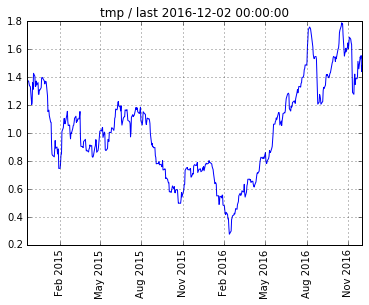

In [10]:
plot( contango )

The largest variable component to the cost-of-carry is **interest**. We filter that out by subtracting the LIBOR rate obtained from the futures on Eurodollars. We shall call the result: **tango**.

In [11]:
tango = todf( contango - libor )

In [12]:
tail( tango )

                   Y
Date                
2016-11-23  0.518495
2016-11-25  0.462106
2016-11-28  0.552680
2016-11-29  0.549615
2016-11-30  0.564493
2016-12-01  0.452212
2016-12-02  0.493225

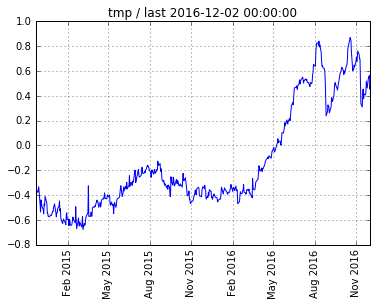

In [13]:
#  MAIN chart <- pay attention here !!
plot( tango )

In [14]:
tango.describe()

                Y
count  512.000000
mean    -0.131907
std      0.422571
min     -0.679746
25%     -0.427747
50%     -0.321510
75%      0.197633
max      0.869532

Usually *tango* has approximate mean of zero, with somewhat 
wide latitude: 2015-10-09 at 18 bp standard deviation (annualized), 
2016-12-02 at 42 bp standard deviation (annualized).

Since warehousing costs for gold are fairly constant across time, 
changes in tango mainly reflect supply and demand. 
A major component of tango is the **leasing rate**. 

The *London Bullion Market Association* had published daily data 
on the *Gold Forward Offered Rate*, or **GOFO**.  These are rates 
at which LBMA members are prepared to lend gold on a swap against 
U.S. dollars. Historically there has been negative leasing rates, 
meaning that the lessors were willing to actually pay you to borrow gold from 
them [but mostly likely it is a  central bank is paying some 
bullion bank to take their gold]. 
Unfortunately, the GOFO dataset has been **discontinued** as of 30 January 2015.

In [15]:
#  For historians:
Image(url='https://www.mcoscillator.com/data/charts/weekly/GOFO_1mo_1995-2014.gif', embed=False)

## Relationship to cash prices

We now look at the current London PM gold fix series.

In [16]:
xau = get( d4xau )

In [17]:
#  This matches the futures sample size:
xau0 = tail( xau, 512 )

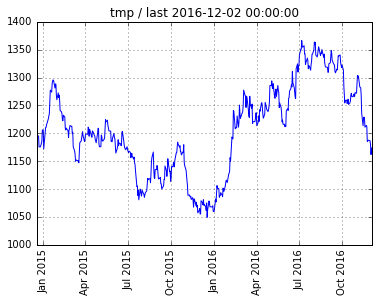

In [18]:
plot( xau0 )

In [19]:
#  Is there near-term correlation between price and tango?
#  stat2( xau0[Y], tango[Y] )
#  2015-09-11  correlation: 0.09, so NO.

In [20]:
#  Running annual percentage change in spot price:
xau0pc = tail( pcent(xau, 256), 512 )

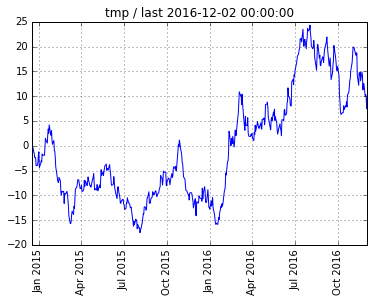

In [21]:
plot ( xau0pc )

In [22]:
#  Is there near-term correlation between price change and tango?
stat2( xau0pc[Y], tango[Y] )
#  2015-09-11  correlation: -0.85, so YES.
#  2015-10-09  correlation: -0.83
#  2016-12-02  correlation: +0.81, but change in sign!

 ::  FIRST variable:
count    512.000000
mean      -0.329825
std       11.062097
min      -17.529926
25%       -9.403597
50%       -3.585356
75%        7.529238
max       24.316317
Name: Y, dtype: float64

 ::  SECOND variable:
count    512.000000
mean      -0.131907
std        0.422571
min       -0.679746
25%       -0.427747
50%       -0.321510
75%        0.197633
max        0.869532
Name: Y, dtype: float64

 ::  CORRELATION
0.807198796038
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     920.0
Date:                Sun, 04 Dec 2016   Prob (F-statistic):          1.02e-114
Time:                        09:46:52   Log-Likelihood:                -1628.5
No. Observations:                 494   AIC:                             3261.
Df

## Closing comments 2015-10-11

So roughly speaking, **increasing tango is correlated to decling prices.** 
Thus increasing selling pressure in the near-term versus the 
distant-term (which in effect widens tango) is correlated to 
future declines in cash prices. 
Equivalently, **decreasing tango is correlated to increasing prices.**

Since tango is currently near its mean value, 
it seems equally likely to decrease or increase 
(though its short-term trend is upwards), so the 
future direction of gold prices seems inconclusive.

## Closing comments 2016-12-02

The new data over the last 13 months has reversed the sign 
of the correlation. In other words, the relationship previously 
noted in closing is spurious. 
(Please see the previous commit of this entire notebook 
for specific details.)

Tango as an indicator is [**not**] insightful for price changes 
whenever it is at the extremes of its expected range.